# Python progress chart

- toc:false
- branch: master
- badges: true
- comments: false
- categories: [python]
- hide: true

In [110]:
from github import Github
import matplotlib.pyplot as plt
import numpy as np

In [94]:
tasks = ['Create, save and open a Jupyter Notebook', 'Create a Python list']

In [95]:
g = Github(${{ secrets.GH_TOKEN }})

In [96]:
repo = g.get_repo("nu-cem/CompPhys")
checklist_issues = repo.get_issues(labels=["python_checklist"])

In [106]:
totals = [0]*len(tasks)

for issue in checklist_issues:
    body = issue.body
    for i,task in enumerate(tasks):
        if task in body:
            splits = body.split(task,maxsplit=2)
            if splits[0][-4:-1] == '[x]':
                totals[i] += 1
        else:
            print("problem: task not in string")

Text(0.5, 1.0, 'Python basics checkbox progress')

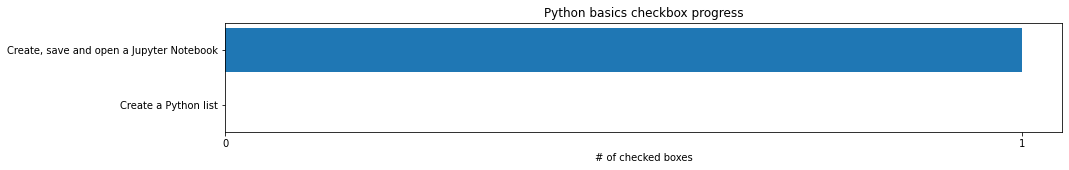

In [128]:
fig, ax = plt.subplots(1,1,figsize=(15,len(tasks)))

ax.barh(np.arange(len(tasks)),totals, align='center')
ax.set_yticks(np.arange(len(tasks)))
ax.set_xticks(np.arange(max(totals)+0.1))
ax.set_yticklabels(tasks)
ax.invert_yaxis()
ax.set_xlabel('# of checked boxes')
ax.set_title("Python basics checkbox progress")